# Extract MILC output with python script
Sept 14, 2023

## Description of columns in parse script : 



- Solve time =  2 x sum of all mass-solve times


- quda-total-time = solve-time + mg-setup + epsilon

- summed_time = quda_total_time + contractions + epsilon

- milc_total_time = summed_time + err

In [1]:
! hostname

jupyter-venkitesh


In [2]:
import os, glob
import subprocess as sp
import numpy as np
import shutil

import re

import pandas as pd

import matplotlib.pyplot as plt
from ipywidgets import *

import itertools

In [3]:
from python_parse import *

In [4]:
%matplotlib widget

In [5]:
top_dir='/gpfs/alpine/lgt104/proj-shared/ayyar/runs_frontier/runs_jan27_2023'

runs_lst=[
['cg_summit_144','cg','/gpfs/alpine/lgt104/proj-shared/ayyar/runs_summit/runs_june8_2023/cg_144/output-cg_144_summit.kpp'],
['cg_crusher_144','cg','~/mg_output_files/output-cg_144_crusher.kpp'],
# ['cg_summit_192','cg','/gpfs/alpine/lgt104/proj-shared/ayyar/runs_summit/runs_june8_2023/cg_192/output-cg_192_summit.kpp'],
# ['cg_frontier_192','cg', ~/mg_output_files/output-cg_192_frontier.kpp'],

['cg_frontier_144_split1','cg','~/mg_output_files/output-cg_144_frontier_with_split.kpp'],
['cg_frontier_144_split2','cg_split','~/mg_output_files/output-cg_144_frontier_aug_2023.kpp'],
    
    
['mg_frontier_144_split','mg','~/mg_output_files/output-full_144_frontier_aug_2023.kpp'],

# 'summit_144_savingNN','mg','/gpfs/alpine/lgt104/proj-shared/ayyar/runs_summit/runs_june8_2023/run_144/output-full_1_savingNN.kpp',
    
# ['old_crusher_2_hprec','mg','/gpfs/alpine/lgt104/proj-shared/ayyar/runs_crusher/runs_feb2_2023_mpich8.1.12/output-full-2.kpp'],
# ['crusher_latest_144_savingNN','mg','~/mg_output_files/output-full_1_savingNN.kpp'],
# ['crusher_latest_144_readingNN','mg','~/mg_output_files/output-full_2_readingNN.kpp'],
# ['frontier_144_savingNN','mg','~/mg_output_files/output-full_1_savingNN_144_frontier.kpp'\,

# ['summit_192','mg','/gpfs/alpine/lgt104/proj-shared/ayyar/runs_summit/runs_june8_2023/run_192/output-full-run-1.kpp'],

# ['frontier_192','mg','~/mg_output_files/output-full_1_correct_ip.kpp'],
]



In [6]:
## Parse output files

df_data=pd.DataFrame([])

op_files=[]
for count,i in enumerate(runs_lst):
#     op_file='op%s.out'%(count)
#     run_type='cg' if count<3 else 'mg'   ## Assume first few runs are cg, rest mg ##!
#     print(fl,run_type)
#     cmd='./parse.sh %s %s > %s'%(fl,run_type,op_file)
#     op=sp.check_output(cmd,shell=True,text=True)
    
#     ## Run bash script to parse output
#     # cmd=['./parse.sh',fl,run_type,' > op%s.out'%(count+1)]
#     # op=sp.run(cmd,check=True,capture_output=True,text=True)
    
#     print(cmd)
#     print(op)
#     ## Append output file names to list
#     op_files.append(op_file)
    
    
    # print(run_type,fname)
    
    dict1 = f_extract(fname=i[2],run_type=i[1])
    dict1['name']=i[0]
    
    # f_print_dict(dict1)
    
    df_data=pd.concat([df_data,pd.DataFrame(dict1,index=[count])])
    count+=1

cols=['name', 'startup', 'loading', 'mg-setup',
       'make/save-src', 'mass-01', 'mass-02', 'mass-03', 'mass-04-10', 'mass-01-10',
       'mass-11-20', 'solve-time','contractions', 'quda-total-time','summed-time', 'error',
       'milc-total-time']

df_data=df_data[cols].copy()
    
    

36


In [7]:
df_data

,name,startup,loading,mg-setup,make/save-src,mass-01,mass-02,mass-03,mass-04-10,mass-01-10,mass-11-20,solve-time,contractions,quda-total-time,summed-time,error,milc-total-time
0,cg_summit_144,87.66544,341.9834,0.00,202.11310,NaN,NaN,NaN,NaN,649.758730,93.773073,1487.063606,186.91740,1667.382,2305.742946,26.688054,2332.431
1,cg_crusher_144,37.29403,695.1410,0.00,24.36905,NaN,NaN,NaN,NaN,392.208190,55.289390,894.995161,329.71670,979.632,1981.515941,17.702059,1999.218
2,cg_frontier_144_split1,29.99796,696.4853,0.00,22.03987,NaN,NaN,NaN,NaN,521.964200,59.785006,1163.498412,341.95480,1244.695,2253.976342,17.703658,2271.680
3,cg_frontier_144_split2,29.81415,615.4957,0.00,21.79804,45.200277,30.932485,22.383370,108.152805,206.668937,57.016505,527.370885,84.63954,735.440,1279.118315,215.405685,1494.524
4,mg_frontier_144_split,35.08017,635.0784,4966.58,21.59077,27.083635,21.891919,21.822319,118.695360,189.493233,62.424405,503.835277,73.42630,5482.692,6235.590917,17.117083,6252.708


In [ ]:
df_data



- Solve time =  2 x sum of all mass-solve times


- quda-total-time = solve-time + mg-setup + epsilon

- summed_time = quda_total_time + contractions + epsilon

- milc_total_time = summed_time + err




In [ ]:
# df_data.iloc[[3,10,11]]
# df_data.iloc[[2,5,7,8,9]]
# df_data.iloc[[3,8,11]]

In [ ]:
sub_list=['name','mg-setup','solve-time','milc-total-time']
df[sub_list]

## Plots

,name,summed-time
0,cg_summit_144,2305.742946
1,cg_crusher_144,1981.515941
2,cg_frontier_144_split1,2253.976342
3,cg_frontier_144_split2,1279.118315
4,mg_frontier_144_split,6235.590917


['cg_summit_144' 'cg_crusher_144' 'cg_frontier_144_split1'
 'cg_frontier_144_split2' 'mg_frontier_144_split'] [2305.7429464 1981.5159406 2253.9763415 1279.118315  6235.5909166]


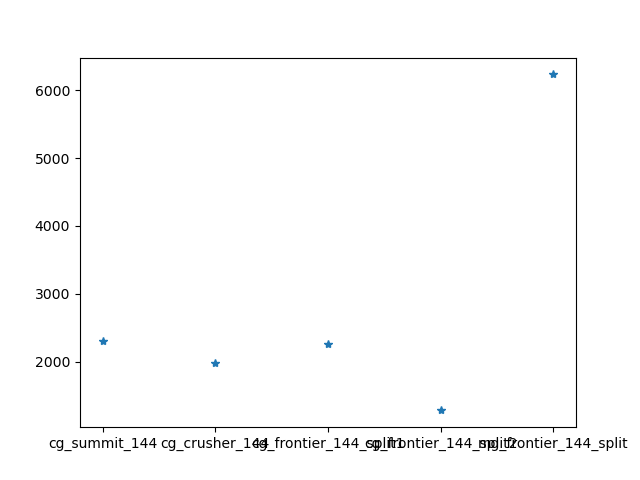

In [9]:
y_options=['mass-01', 'mass-02', 'mass-03', 'mass-04-10', 'mass-11-20',
       'startup', 'loading', 'mg-setup', 'solve-time', 'make/save-src',
       'contractions', 'summed-time', 'quda-total-time', 'milc-total-time',
       'error', 'mass-01-10']


def f_compare_plot(df,y,x='name'):
    # df.plot(x=x,y=y,kind='line',marker='D')
    
    display(df[[x,y]])
    
    x=df.name.values
    y=df[y].values
    print(x,y)
    plt.figure()
    plt.plot(x,y,marker='*',linestyle='')
    # plt.plot(y,marker='*')
    # plt.legend()
    plt.show()
    
df=df_data.copy()
# df.plot(x='name',y='summed-time',kind='line',marker='*')
f_compare_plot(df,'summed-time','name')

In [10]:
interact(f_compare_plot,df=fixed(df),y=y_options,x=fixed('name'))

interactive(children=(Dropdown(description='y', options=('mass-01', 'mass-02', 'mass-03', 'mass-04-10', 'mass-…

<function __main__.f_compare_plot(df, y, x='name')>

In [12]:
def f_plot_together(df,labels_lst,markers_lst): 
    plt.figure()
    x=df.name.values

    for label,marker in zip(labels_lst,markers_lst):
        y=df[label].values
        plt.plot(x,y,marker=marker,label=label)

    plt.legend()


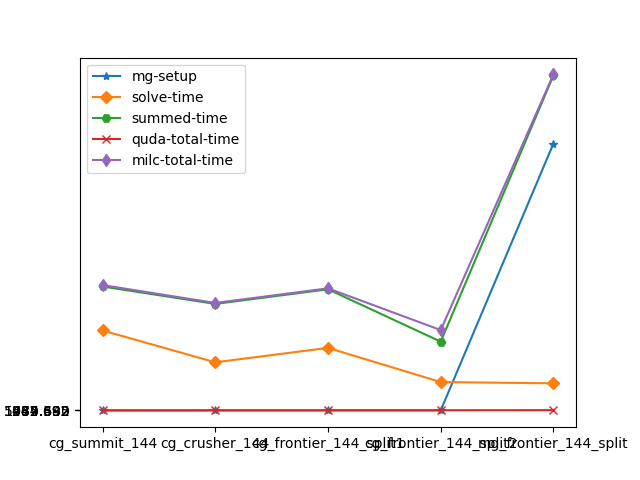

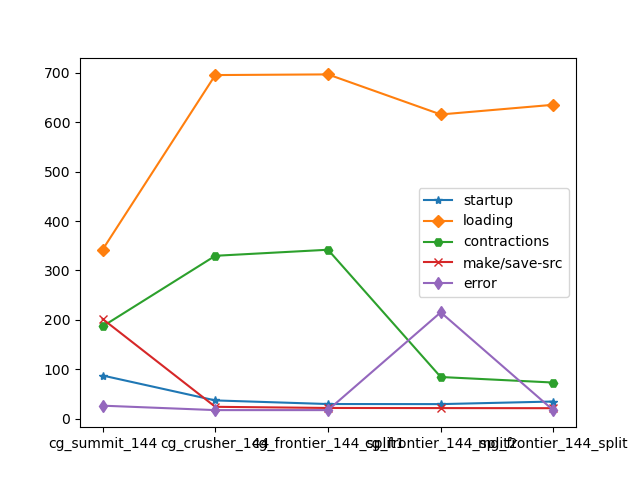

In [13]:
markers=['*','D','H','x','d','p','1','2','h','v']
labels=['startup', 'loading', 'mg-setup', 'solve-time', 'make/save-src',
       'contractions', 'summed-time', 'quda-total-time', 'milc-total-time',
       'error']

labels1=['mg-setup', 'solve-time','summed-time', 'quda-total-time', 'milc-total-time']

labels2=['startup', 'loading','contractions','make/save-src','error']

f_plot_together(df,labels1,markers)
f_plot_together(df,labels2,markers)
